<a href="https://colab.research.google.com/github/neSTORY/Deeplearning_Zero_to_All/blob/master/lec_11_1_simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## code

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.7.0


(1, 3, 3, 1)


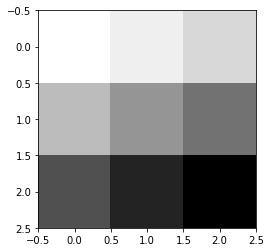

In [14]:
## filter의 개수가 1개일 때 ##

image = tf.constant(
    [[[[1],[2],[3]],
       [[4],[5],[6]],
       [[7],[8],[9]]]],
     dtype = tf.float32
)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap = "Greys")

(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


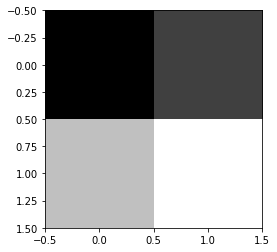

In [33]:
"""
임의로 filter를 생성해서 넣어줄 때는 shape을 다르게 넣어준다.
shape : [width, height, input_ch, output_ch]
"""
weight = np.ones((2,2,1,1))
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding="valid",
                             kernel_initializer=weight_init)(image)

print(conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap="gray")
plt.show()

In [36]:
## filter의 개수가 3개일 때 ##
weight = np.array(
    [[[[1.,10.,-1.]],[[1.,10.,-1.]]],
      [[[1.,10.,-1.]],[[1.,10.,-1.]]]]
)
print(weight.shape)

(2, 2, 1, 3)


In [39]:
image.shape

TensorShape([1, 3, 3, 1])

In [38]:
from warnings import filters
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=(2,2), padding="same",
                         kernel_initializer=weight_init)(image)
print(conv2d.shape)

(1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


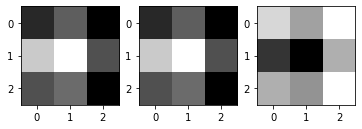

In [43]:
feature_maps = np.swapaxes(conv2d, 0, 3)
feature_maps.shape # (3,3,3,1)

for i, feature_map in enumerate(feature_maps):
  print(feature_map.reshape(3,3))
  plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap="gray")